In [36]:
# !pip install wordcloud
# ! pip install pillow


ladybug4.txt


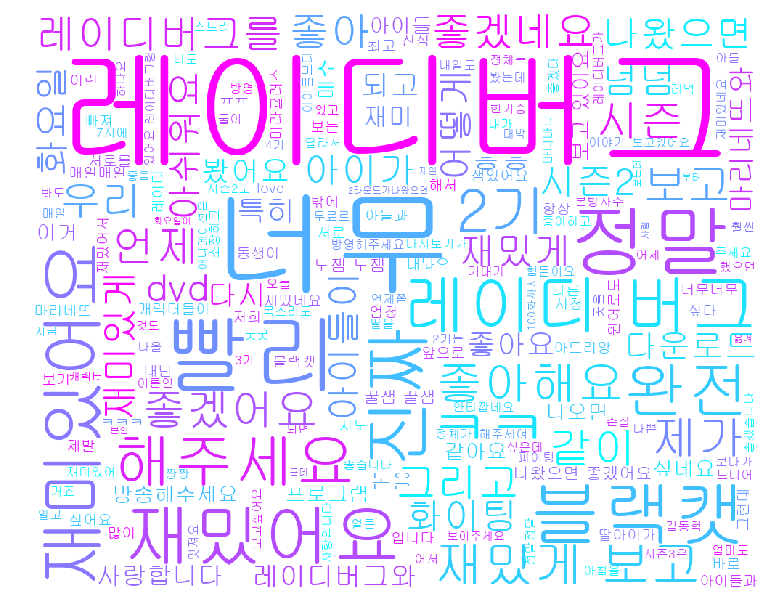

In [11]:
def paint():
    from wordcloud import WordCloud, STOPWORDS      # 워드 클라우딩 모듈
    import matplotlib.pyplot as plt                 # 시각화 모듈
    from os import path                             # 텍스트 파일을 불러오기 위한 open, path 하기 위해 os 임포트
    import re

    file = input()
    text = open(file, mode="r", encoding="UTF-8").read()     # 텍스트파일을 open 하는데 reading만 되게 (mode="r"), UTF-8 방식으로 불러옴

    text = re.sub("있다",'',text)
    text = re.sub("있습니다",'',text)
    text = re.sub("있는",'',text)
    text = re.sub("하지만",'',text)
    text = re.sub("것이다",'',text)
    text = re.sub("대한",'',text)
    text = re.sub("통해",'',text)
    text = re.sub("함께",'',text)
    text = re.sub("인공지능",'',text)

    text = re.sub("hani",'',text)
    text = re.sub("한다",'',text)
    text = re.sub("하는",'',text)
    text = re.sub("위해",'',text)
    text = re.sub("co",'',text)
    text = re.sub("kr",'',text)
    text = re.sub("위한",'',text)
    text = re.sub("했다",'',text)
    text = re.sub("같은",'',text)
    text = re.sub("것은",'',text)


    wordcloud = WordCloud(font_path='C://Windows//Fonts//gulim.ttc',           # 폰트 위치(거의 기본적으로 C://Windows//Fonts 안에 들어있습니다)
                          stopwords=STOPWORDS, background_color='white',        # STOPWORDS 옵션은 공백/줄바꾸기 기준으로 단어를 추출해 냅니다
                          width=1000,                                           # background_color는 워드클라우드 배경색을 나타냅니다. 'black'으로하면 검은색이 됩니다.
                          height=800,                                           # width와 height는 워드클라우드의 크기를 지정해 줍니다.
                          colormap='cool').generate(text)                       # colormap은 워드 색깔을 지정해주는데 첨부한 색감표를 사용하시면 됩니다. generate() 메소드는


    plt.figure(figsize=(13,13))                                                 # matplotlib의 pyplot을 figsize로 생성합니다
    plt.imshow(wordcloud)                                                       # 워드 클라우드 이미지를 pyplot에 띄웁니다
    plt.axis("off")                                                             # pyplot에 x, y축 표시를 없앱니다.
    plt.show()
    
paint()

■ Python Comprehension

1. list Comprehension
    [ 출력표현식 for 요소 in 입력시퀀스 if 조건식 ]
    
2. set Comprehension
    { 출력표현식 for 요소 in 입력시퀀스 if 조건식 }
    
3. Dictionary Comprehension
    { Key:Value for 요소 in 입력시퀀스 if 조건식 }

In [2]:
# list Comprehension 예:
oldlist = [1, 2, 'A',False,3]
newlist = [i*i for i in oldlist if type(i) == int]
print(newlist)

[1, 4, 9]


In [7]:
# set Comprehension 예:
oldlist = [1,2,4,3,2,3]

newlist = {i*i for i in oldlist}

print(newlist)

# comprehension 안쓴 코드

newlist = set()

for i in oldlist:
    newlist.add(i * i)
    
print(newlist)

{16, 1, 4, 9}
{16, 1, 4, 9}


In [9]:
# Dictionary Comprehension 예:
id_name = {1:'신현수',2:'김광록',3:'김원섭'}

# key value 트레이딩
a = { val:key for key, val in id_name.items() }
print(a)

# comprehension 안쓴 코드
a = {}
for key, val in id_name.items():
    a[val] = key
print(a)

{'신현수': 1, '김광록': 2, '김원섭': 3}
{'신현수': 1, '김광록': 2, '김원섭': 3}


In [17]:
# 문제.판다스를 이용하지 말고 comprehension을 활용해서 사원테이블의 토탈월급을 출력하시오

import csv

file = open("emp2.csv")
emp = csv.reader(file)

sumsal = sum([int(emp_list[5]) for emp_list in emp])
sal = [int(emp_list[5]) for emp_list in emp]

print(sumsal)
print(sum(sal))
# 최대월급
print(max(sal))
print(min(sal))

29025
5000
800


■ 문자열이 알파벳인지 검사하기 (isalpha)

1. 알파벳이 맞는지 확인: isalpha
2. 숫자가 맞는지 확인: isdigit
3. 공백이 맞는지 확인: isspace

In [30]:
# 문제. 겨울왕국에 알파벳 문자의 갯수가 어떻게 되는가?

file = open('winter.txt')
lines = file.readlines()
total = 0

for s in lines:
    cnt = sum(i.isalpha() for i in s)
#     print(s,cnt)
    total += cnt

print(total)

82180


In [2]:
# 문제. 겨울왕국에 알파벳 숫자의 갯수가 어떻게 되는가?

file = open('winter.txt')
lines = file.readlines()
total = 0

for s in lines:
    cnt = sum(i.isdigit() for i in s)
#     print(s,cnt)
    total += cnt

print(total)

264


■ 문자열이 특수문자가 있는지 검사하기

특수문자 = 전체문자 - (문자 + 숫자 + 공백)

In [4]:
# 예:
file = open("winter.txt")

lines = file.readlines()
total1 = 0
total2 = 0

for s in lines:
    w_cnt = sum(i.isalpha() for i in s)
    n_cnt = sum(i.isdigit() for i in s)
    s_cnt = sum(i.isspace() for i in s)
    cnt = len(s)
    total1 += cnt
    total2 += (w_cnt + n_cnt + s_cnt)
    
print(total1 - total2)

7083


In [ ]:
# 문제. text_mining 클래스에 위의 스크립트를 special_cnt 라는 함수로 만들어서 추가하고 아래와 같이 실행되게 하시오

# import text_mining

class TextMining:

    def __init__(self):
        pass
    
    def findWord(self):
        file = input('input file name : ')
        word = input('input word : ')

        file = open(file, 'r')
        sum = 0
        
        for winter_list in file:
            list_ = winter_list.split(' ')
            for w in list_:
                sum = sum + w.lower().count(word)
                print('\r찾은 개수 %d개' %sum, end='')
    
    def paint(self):
        from wordcloud import WordCloud, STOPWORDS      # 워드 클라우딩 모듈
        import matplotlib.pyplot as plt                 # 시각화 모듈
        from os import path                             # 텍스트 파일을 불러오기 위한 open, path 하기 위해 os 임포트
        import re

        file = input()
        text = open(file, mode="r", encoding="UTF-8").read()     # 텍스트파일을 open 하는데 reading만 되게 (mode="r"), UTF-8 방식으로 불러옴

        text = re.sub("있다",'',text)
        text = re.sub("있습니다",'',text)
        text = re.sub("있는",'',text)
        text = re.sub("하지만",'',text)
        text = re.sub("것이다",'',text)
        text = re.sub("대한",'',text)
        text = re.sub("통해",'',text)
        text = re.sub("함께",'',text)
        text = re.sub("인공지능",'',text)

        text = re.sub("hani",'',text)
        text = re.sub("한다",'',text)
        text = re.sub("하는",'',text)
        text = re.sub("위해",'',text)
        text = re.sub("co",'',text)
        text = re.sub("kr",'',text)
        text = re.sub("위한",'',text)
        text = re.sub("했다",'',text)
        text = re.sub("같은",'',text)
        text = re.sub("것은",'',text)


        wordcloud = WordCloud(font_path='C://Windows//Fonts//gulim.ttc',           # 폰트 위치(거의 기본적으로 C://Windows//Fonts 안에 들어있습니다)
                              stopwords=STOPWORDS, background_color='white',        # STOPWORDS 옵션은 공백/줄바꾸기 기준으로 단어를 추출해 냅니다
                              width=1000,                                           # background_color는 워드클라우드 배경색을 나타냅니다. 'black'으로하면 검은색이 됩니다.
                              height=800,                                           # width와 height는 워드클라우드의 크기를 지정해 줍니다.
                              colormap='cool').generate(text)                       # colormap은 워드 색깔을 지정해주는데 첨부한 색감표를 사용하시면 됩니다. generate() 메소드는


        plt.figure(figsize=(13,13))                                                 # matplotlib의 pyplot을 figsize로 생성합니다
        plt.imshow(wordcloud)                                                       # 워드 클라우드 이미지를 pyplot에 띄웁니다
        plt.axis("off")                                                             # pyplot에 x, y축 표시를 없앱니다.
        plt.show()
    
    def special_cnt(self):
        file = input

        lines = file.readlines(open(file))
        total1 = 0
        total2 = 0

        for s in lines:
            w_cnt = sum(i.isalpha() for i in s)
            n_cnt = sum(i.isdigit() for i in s)
            s_cnt = sum(i.isspace() for i in s)
            cnt = len(s)
            total1 += cnt
            total2 += (w_cnt + n_cnt + s_cnt)

        print(total1 - total2)
                
find_w = TextMining()
find_w.findWord()